### Lineare Regression (1)

In [1]:
library(caret)
library(data.table)

dt <- fread("data/tsla.csv")
dt[, Date := as.numeric(as.POSIXct(Date))]

# Open ~ Date (Variable Open hängt von Date ab)
# method = "lm" (linear model)
# trainControl(method = "none") no cross validation
model <- train(Open ~ Date, data = dt, method = "lm",
               trControl = trainControl(method = "none"))

print(model$finalModel)

Loading required package: ggplot2

Loading required package: lattice




Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
(Intercept)         Date  
 -1.542e+03    1.209e-06  



### Lineare Regression (2)

         Date       Open
        <num>      <num>
1: 1277769600   3.248377
2: 1580688000 369.614673


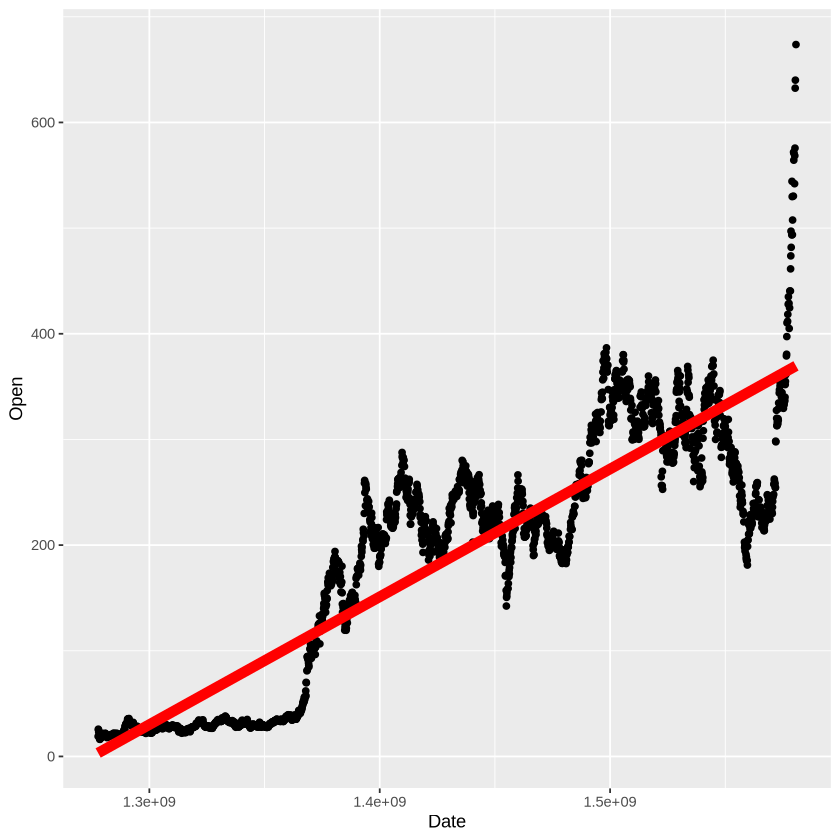

In [4]:
library(caret)
library(data.table)
library(ggplot2)

dt <- fread("data/tsla.csv")
dt[, Date := as.numeric(as.POSIXct(Date))]

# train Linear Model
model <- train(Open ~ Date, data = dt, method = "lm",
               trControl = trainControl(method = "none"))

# data for predictions
dt.pred <- data.table(Date = c(dt[, min(Date)], dt[, max(Date)]))

# predict
pre <- predict(model, newdata = dt.pred)
dt.pred[, Open := pre]
print(dt.pred)

# plot with predictions in red
g <- ggplot(data = dt, mapping = aes(Date, Open)) + 
  geom_point() + 
  geom_line(data = dt.pred, color = "red", linewidth = 3)
print(g)

### Lineare Regression (3)

       1 
416.9431 
         Date       Open
        <num>      <num>
1: 1277769600   3.248377
2: 1619820000 416.943082


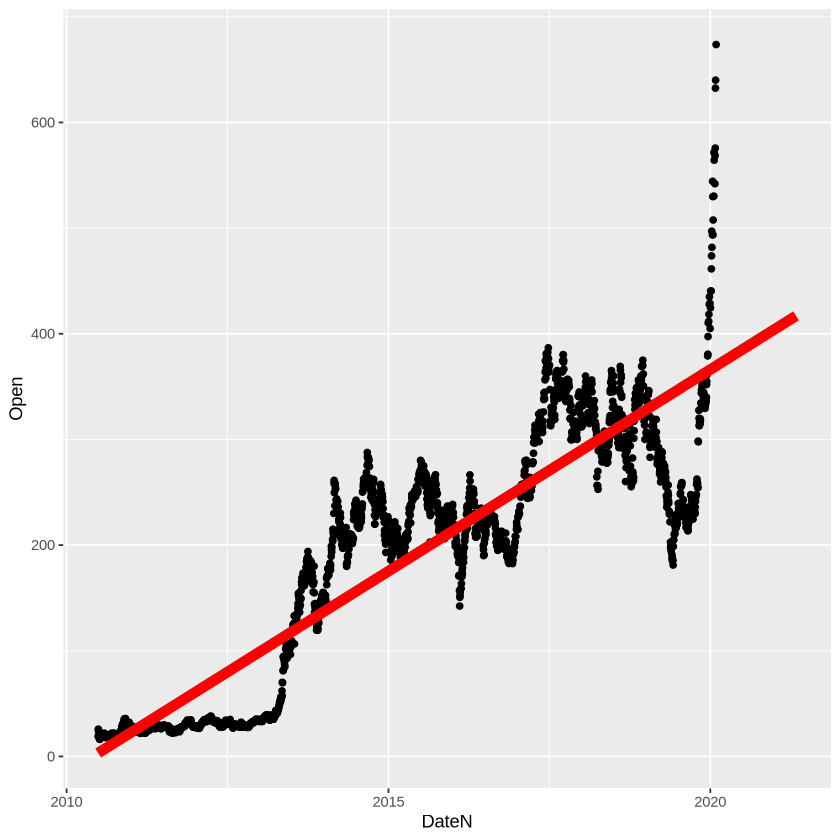

In [6]:
library(caret)
library(data.table)
library(ggplot2)

dt <- fread("data/tsla.csv")
dt[, Date := as.numeric(as.POSIXct(Date))]

# train model
model <- train(Open ~ Date, data = dt, method = "lm",
               trControl = trainControl(method = "none"))

max.date <- as.numeric(as.POSIXct("2021-05-01"))

# predict with new data
print(predict(model, newdata = data.table(Date = max.date)))

# new data and predict
dt.pred <- data.table(Date = c(dt[, min(Date)], max.date))
pre <- predict(model, newdata = dt.pred)
dt.pred[, Open := pre]
print(dt.pred)

dt[, DateN := as.POSIXct(Date, origin = "1970-01-01")]
dt.pred[, DateN := as.POSIXct(Date, origin = "1970-01-01")]

g <- ggplot(data = dt, mapping = aes(DateN, Open)) + 
  geom_point() + 
  geom_line(data = dt.pred, color = "red", linewidth = 3)
print(g)

### Lineare Regression mit mehreren Variablen

In [7]:
library(caret)
library(data.table)
library(ggplot2)

dt <- fread("data/kc_house_data.csv")

# price ~ Variable 1 + Variable 2
model <- train(price ~ bedrooms + bathrooms, data = dt, method = "lm", 
               trControl = trainControl(method = "none"))

dt.pred <- data.table(bedrooms = c(3, 10), bathrooms = c(2, 4))
pred <- predict(model, newdata = dt.pred)
print(pred)

      1       2 
 505333 1121862 
